# Stock Market Prediction using Numerical and Textual Analysis

In this project, I will do a stock market prediction on the DogeCoin dataset using the Indian news headlines dataset. This prediction will use numerical and textual analysis to predict the stock price.

India news dataset: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DPQMQH

DogeCoin dataset: https://finance.yahoo.com/quote/DOGE-USD/history?p=DOGE-USD

## Data Loading and Cleaning

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [59]:
news_df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [60]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


We can clearly see that the publish_date column needs to be modified and converted to python date.

In [61]:
from datetime import datetime

date_format = "%Y%m%d"
news_df['publish_date'] = news_df['publish_date'].apply(lambda x: datetime.strptime(str(x), date_format))

news_df['publish_date']

0         2001-01-02
1         2001-01-02
2         2001-01-02
3         2001-01-02
4         2001-01-02
             ...    
3650965   2022-03-31
3650966   2022-03-31
3650967   2022-03-31
3650968   2022-03-31
3650969   2022-03-31
Name: publish_date, Length: 3650970, dtype: datetime64[ns]

In [62]:
doge_df = pd.read_csv('DOGE-USD.csv')
doge_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,0.009031,0.009063,0.008101,0.008909,0.008909,50616900
1,2018-01-02,0.008873,0.009598,0.008551,0.009145,0.009145,89424096
2,2018-01-03,0.009088,0.009584,0.008882,0.009320,0.009320,66349900
3,2018-01-04,0.009346,0.010036,0.008768,0.009644,0.009644,108986000
4,2018-01-05,0.009660,0.012283,0.009589,0.012167,0.012167,212383008
...,...,...,...,...,...,...,...
1546,2022-03-27,0.135900,0.144858,0.135703,0.144732,0.144732,1445019558
1547,2022-03-28,0.144725,0.152737,0.142457,0.142657,0.142657,1476875507
1548,2022-03-29,0.142557,0.148559,0.141290,0.144470,0.144470,961074557
1549,2022-03-30,0.144456,0.144997,0.139880,0.143210,0.143210,884305263


In [63]:
doge_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [64]:
doge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1551 non-null   object 
 1   Open       1551 non-null   float64
 2   High       1551 non-null   float64
 3   Low        1551 non-null   float64
 4   Close      1551 non-null   float64
 5   Adj Close  1551 non-null   float64
 6   Volume     1551 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 84.9+ KB


In the DOGE-USD file, we have info about the stock prices from 2018-01-01 to 2022-03-31, so we have to extract the news headlines that only was published in this period.

In [65]:
# Define the date range
start_date = datetime(2018, 1, 1)
end_date = datetime(2022, 3, 31)

# Filter the rows within the specified date range
news_df = news_df[(news_df['publish_date'] >= start_date) & (news_df['publish_date'] <= end_date)]

news_df = news_df.reset_index(drop=True)

news_df

,publish_date,headline_category,headline_text
0,2018-01-01,life-style.beauty,5 easy beauty resolutions you can follow in 2017
1,2018-01-01,india,Survey proposes law to promote transparency of...
2,2018-01-01,city.dehradun,'We've to depend on overpriced cab services to...
3,2018-01-01,life-style.health-fitness.diet,planning to make your diet better in 2018 just...
4,2018-01-01,life-style.events,New Year Resolutions 2018: Let's aim for these...
...,...,...,...
846183,2022-03-31,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
846184,2022-03-31,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
846185,2022-03-31,city.trichy,As Covid-19 cases drop to nil in southern dist...
846186,2022-03-31,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


## Data Exploration and Preparation

### Numerical Analysis:

- Check for missing values.
- Compute summary statistics.
- Calculate daily price change percentage.
- Calculate moving averages (7-day and 30-day).
- Calculate Relative Strength Index (RSI).
- Remove rows with missing values.
- Set date as the index.
- Display the updated dataframe for review.

In [66]:
# Check for missing values in doge_df
missing_values = doge_df.isnull().sum()

# Summary statistics for numerical columns
summary_stats = doge_df.describe()

# Calculate daily price change percentage
doge_df['Price_Change_Percentage'] = ((doge_df['Close'] - doge_df['Open']) / doge_df['Open']) * 100

# Calculate moving averages (e.g., 7-day and 30-day)
doge_df['7_Day_MA'] = doge_df['Close'].rolling(window=7).mean()
doge_df['30_Day_MA'] = doge_df['Close'].rolling(window=30).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

doge_df['RSI'] = calculate_rsi(doge_df)

# Drop rows with missing values (if any)
doge_df.dropna(inplace=True)

doge_df = doge_df.reset_index(drop=True)

# Explore the updated dataframe
doge_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change_Percentage,7_Day_MA,30_Day_MA,RSI
0,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874
1,2018-01-31,0.006001,0.006219,0.005752,0.006010,0.006010,14754700,0.149975,0.006963,0.009600,36.066689
2,2018-02-01,0.006021,0.006090,0.004791,0.005029,0.005029,18748700,-16.475668,0.006586,0.009463,27.516060
3,2018-02-02,0.005023,0.005023,0.003310,0.004475,0.004475,29913700,-10.909815,0.006192,0.009301,25.722047
4,2018-02-03,0.004501,0.005495,0.004159,0.005164,0.005164,18018100,14.730060,0.005876,0.009152,26.892767


### Textual Analysis:

- Check for missing values.
- Explore unique headline categories.
- Sample random headlines.
- Perform sentiment analysis using VADER.
- Aggregate sentiment scores by date.
- Display the updated dataframe for review.

In [67]:
# Check for missing values in news_df
missing_values = news_df.isnull().sum()

# Explore the unique categories in 'headline_category'
unique_categories = news_df['headline_category'].unique()

# Sample of the headlines
sample_headlines = news_df['headline_text'].sample(5)

# Perform sentiment analysis using a library like VADER or TextBlob
# Assuming you're using VADER for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
news_df['Sentiment_Score'] = news_df['headline_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Aggregate sentiment scores by date
sentiment_by_date = news_df.groupby('publish_date')['Sentiment_Score'].mean()

negative_threshold = -0.2
positive_threshold = 0.2

# Create a function to apply thresholds and assign labels
def classify_sentiment(score):
    if score < negative_threshold:
        return 'Negative'
    elif score > positive_threshold:
        return 'Positive'
    else:
        return 'Neutral'

# Apply the function to create a new column 'Sentiment_Label'
news_df['Sentiment_Label'] = news_df['Sentiment_Score'].apply(classify_sentiment)

news_df.head()

,publish_date,headline_category,headline_text,Sentiment_Score,Sentiment_Label
0,2018-01-01,life-style.beauty,5 easy beauty resolutions you can follow in 2017,0.7717,Positive
1,2018-01-01,india,Survey proposes law to promote transparency of...,0.3818,Positive
2,2018-01-01,city.dehradun,'We've to depend on overpriced cab services to...,0.0000,Neutral
3,2018-01-01,life-style.health-fitness.diet,planning to make your diet better in 2018 just...,0.4404,Positive
4,2018-01-01,life-style.events,New Year Resolutions 2018: Let's aim for these...,-0.0772,Neutral


## Train and Evaluate Models

### Train and Evaluate Models for doge_df (Numerical Analysis):

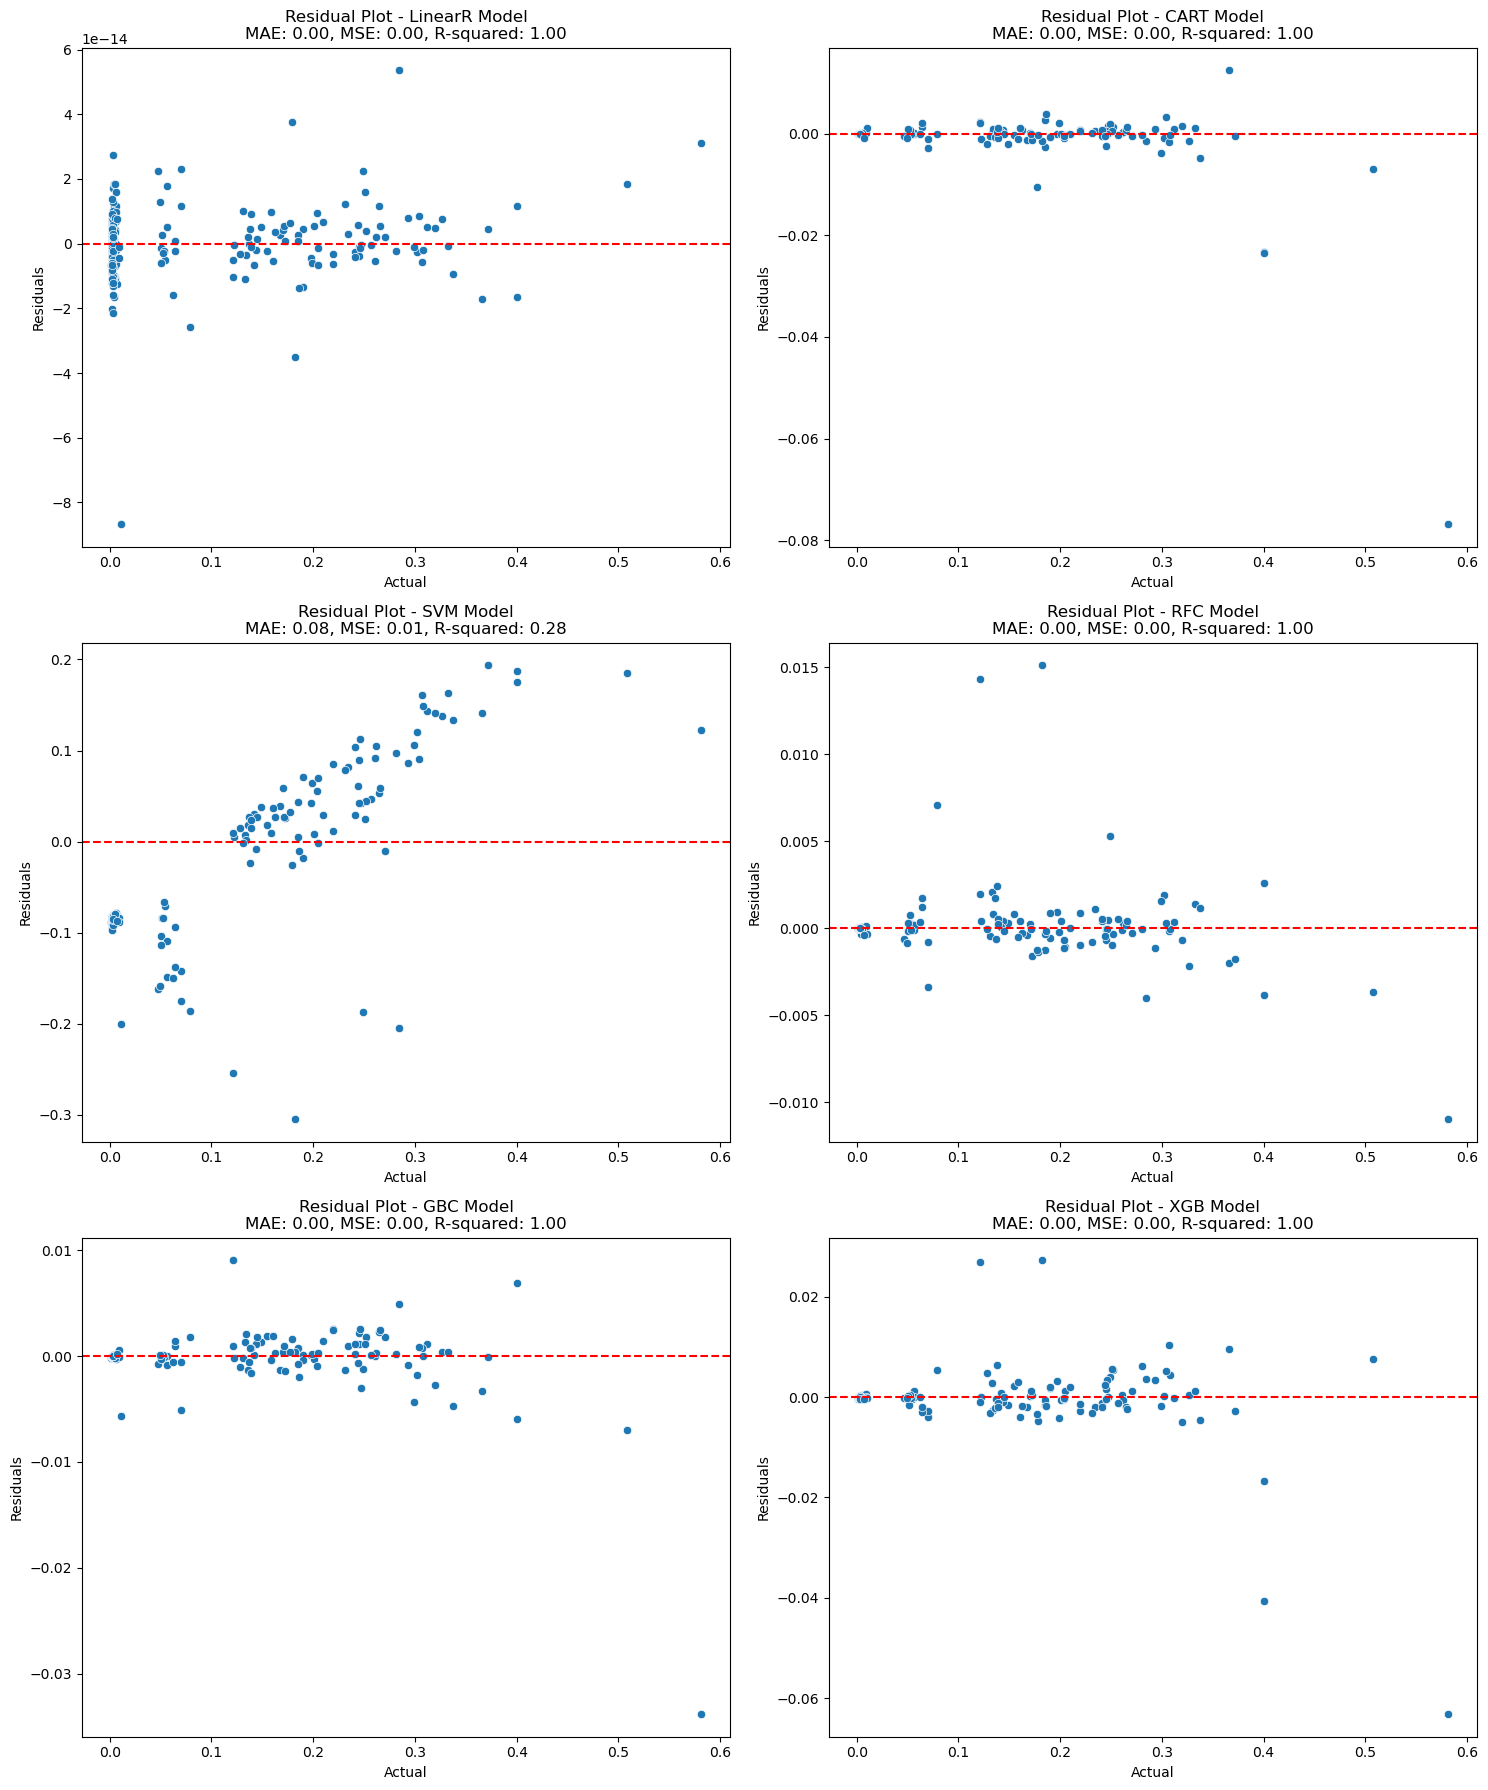

[('LinearR', 5.966757000826559e-15, 9.683315493612111e-29, 1.0),
 ('CART', 0.0008001409836065581, 2.448862533442625e-05, 0.9978828628214069),
 ('SVM', 0.08375749056849457, 0.0083514243978156, 0.2779867858908188),
 ('RFC', 0.00042973157377049816, 2.504367401632495e-06, 0.9997834876697878),
 ('GBC', 0.0005836517511426206, 5.304632835684803e-06, 0.9995413938005158),
 ('XGB', 0.001290051532971028, 2.6962914937742895e-05, 0.9976689508341782)]

In [68]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

def evaluate_models_with_regression_metrics(X, y, models):
    regression_metrics = []  # List to store regression metrics for each model

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Create subplots for residual plots
    num_models = len(models)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_models + 1) // num_cols  # Calculate the number of rows

    # Set up the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
    axes = axes.ravel()

    # Evaluate each model and generate residual plots
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        regression_metrics.append((name, mae, mse, r2))  # Store regression metrics for this model
        
        # Residual plot
        residuals = y_test - predictions
        sns.scatterplot(x=y_test, y=residuals, ax=axes[i])
        axes[i].axhline(0, color='red', linestyle='--')
        axes[i].set_xlabel("Actual")
        axes[i].set_ylabel("Residuals")
        axes[i].set_title(f"Residual Plot - {name} Model\nMAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}")

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()
    return regression_metrics

# Split data into features (X) and target variable (y)
X = doge_df.drop(columns=['Close', 'Date'])  # Assuming 'Close' is the target variable
y = doge_df['Close']

# Define models
models = []
models.append(('LinearR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('RFC', RandomForestRegressor()))
models.append(('GBC', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))

evaluate_models_with_regression_metrics(X, y, models)


If we prioritize the models with the lowest MAE and MSE, then the 'RFC' (Random Forest Regressor) performs the best in this regard and it has almost 1.0 R-squared. So we will use Random Forest Regressor.

In [69]:
# Split data into features (X) and target variable (y)
X = doge_df.drop(columns=['Close', 'Date']) # Assuming 'Close' is the target variable
y = doge_df['Close']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_numerical = RandomForestRegressor()

model_numerical.fit(X_train, y_train)

y_pred = model_numerical.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {round(mae, 4)}")
print(f"MSE: {round(mse, 4)}")
print(f"R2: {round(r2, 4)}")


MAE: 0.0005
MSE: 0.0
R2: 0.9997


### Train and Evaluate Sentiment Analysis Model for news_df (Textual Analysis):

In [70]:
# Split data into features (X) and target variable (y)
X = news_df['headline_text']  # Features
y = news_df['Sentiment_Label']  # Assuming 'Sentiment_Label' is the target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer (you can use other vectorization methods as well)
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

model_textual = LogisticRegression()  

model_textual.fit(X_train_vec, y_train)

y_pred = model_textual.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred) * 100
classification_report = classification_report(y_test, y_pred)

print(f"Accuracy: {round(accuracy, 2)} %")
print ("*"*50)
print("Classification Report:\n", classification_report)


Accuracy: 89.07 %
**************************************************
Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.87      0.90     51210
     Neutral       0.88      0.93      0.91     86527
    Positive       0.87      0.80      0.83     31501

    accuracy                           0.89    169238
   macro avg       0.89      0.87      0.88    169238
weighted avg       0.89      0.89      0.89    169238



### Combining Data

In [73]:
# Convert 'publish_date' in news_df to datetime
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'])

# Convert 'Date' in doge_df to datetime
doge_df['Date'] = pd.to_datetime(doge_df['Date'])

# Merge the DataFrames on the 'publish_date' and 'Date' columns
combined_df = doge_df.merge(news_df[['publish_date', 'Sentiment_Score', 'Sentiment_Label']], left_on='Date', right_on='publish_date', how='inner')

combined_df


,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change_Percentage,7_Day_MA,30_Day_MA,RSI,publish_date,Sentiment_Score,Sentiment_Label
0,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,2018-01-30,0.6705,Positive
1,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,2018-01-30,0.0000,Neutral
2,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,2018-01-30,0.7351,Positive
3,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,2018-01-30,0.3182,Positive
4,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,2018-01-30,-0.5574,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825913,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,2022-03-31,-0.5267,Negative
825914,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,2022-03-31,0.5106,Positive
825915,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,2022-03-31,-0.2732,Negative
825916,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,2022-03-31,0.0000,Neutral


In [74]:
combined_df['Sentiment_Score_7D_Mean'] = combined_df['Sentiment_Score'].rolling(window=7).mean()
combined_df['Sentiment_Score_30D_Mean'] = combined_df['Sentiment_Score'].rolling(window=30).mean()
combined_df.drop(columns= 'publish_date', inplace=True)

combined_df


,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change_Percentage,7_Day_MA,30_Day_MA,RSI,Sentiment_Score,Sentiment_Label,Sentiment_Score_7D_Mean,Sentiment_Score_30D_Mean
0,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,0.6705,Positive,NaN,NaN
1,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,0.0000,Neutral,NaN,NaN
2,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,0.7351,Positive,NaN,NaN
3,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,0.3182,Positive,NaN,NaN
4,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,-0.5574,Negative,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825913,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,-0.5267,Negative,-0.020700,-0.014723
825914,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,0.5106,Positive,0.052243,0.016977
825915,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,-0.2732,Negative,0.013214,0.007870
825916,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,0.0000,Neutral,0.013214,0.007870


In [96]:
combined_df.dropna(inplace=True)
combined_df = combined_df.reset_index(drop=True)

combined_df

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change_Percentage,7_Day_MA,30_Day_MA,RSI,Sentiment_Score,Sentiment_Label,Sentiment_Score_7D_Mean,Sentiment_Score_30D_Mean
0,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,-0.2960,Negative,0.163057,0.117080
1,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,0.0000,Neutral,0.065800,0.094730
2,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,-0.3818,Negative,-0.061686,0.082003
3,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,0.4019,Positive,-0.077214,0.070897
4,2018-01-30,0.006969,0.006992,0.005942,0.006024,0.006024,15855900,-13.560052,0.007117,0.009697,44.035874,0.0000,Neutral,-0.009314,0.060290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825884,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,-0.5267,Negative,-0.020700,-0.014723
825885,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,0.5106,Positive,0.052243,0.016977
825886,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,-0.2732,Negative,0.013214,0.007870
825887,2022-03-31,0.143184,0.147220,0.137172,0.137826,0.137826,1055136949,-3.742038,0.139968,0.125202,68.174070,0.0000,Neutral,0.013214,0.007870


Explained Variance Ratios:
[6.65403805e-01 3.13581318e-01 1.89765971e-02 1.45116679e-03
 5.87112776e-04]


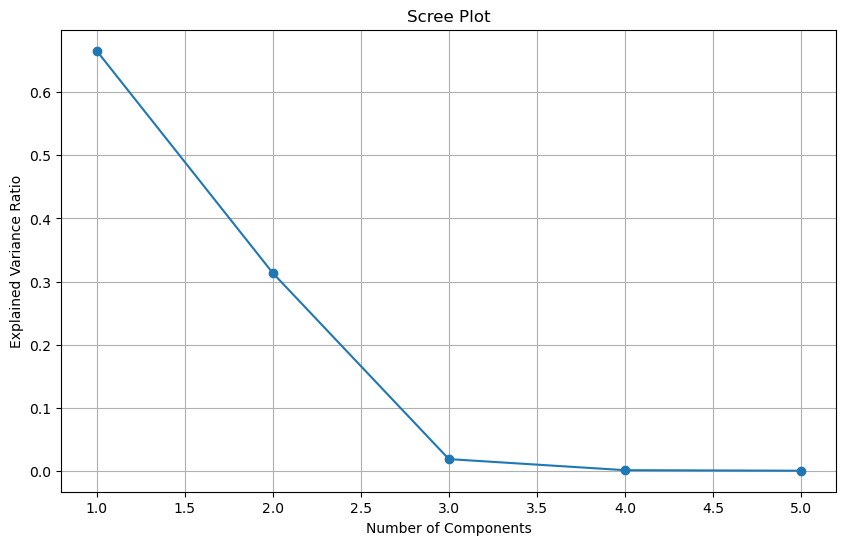

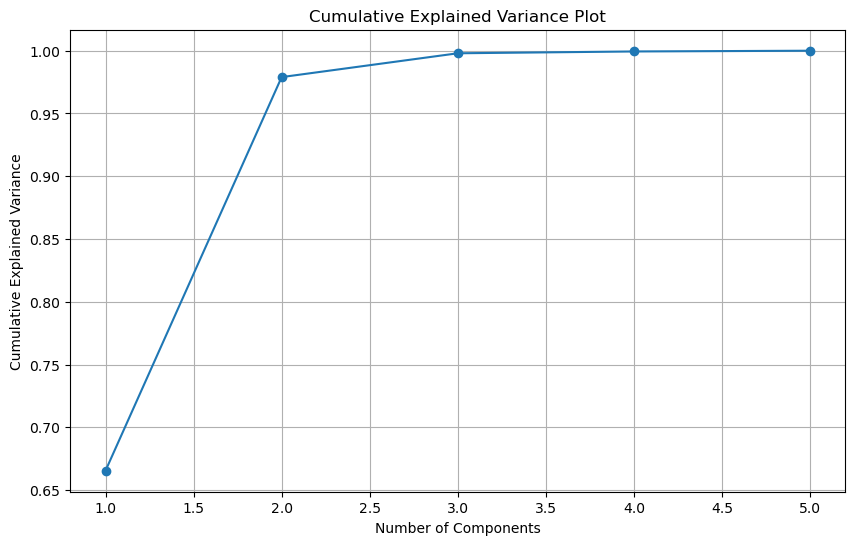

In [88]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.decomposition import PCA

def perform_pca_and_plot_variance(df, num_features):
    # Define X and y
    X = combined_df[features]

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=features)

    y = combined_df['Close']

    pca = PCA()

    # Fit PCA to the scaled data
    pca.fit(X, y)

    # Calculate the explained variance ratio for each component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create a scree plot to visualize explained variance vs. number of components
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)

    # Calculate the cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance_ratio)

    # Create a cumulative explained variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.title('Cumulative Explained Variance Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)

    # You can also print out the explained variance ratios for reference
    print("Explained Variance Ratios:")
    print(explained_variance_ratio)

    plt.show()

# Define the list of numerical features to use for PCA
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment_Score']

# Perform PCA and plot variance
perform_pca_and_plot_variance(combined_df, features)

In [89]:
# X and y for the hybrid model
X = combined_df[features]

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)

n_components = 4
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data and transform it into the specified number of components
X_pca = pca.fit_transform(X)

y = combined_df['Close']

vectorizer = TfidfVectorizer(max_features=5000) 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)

hybrid_model = RandomForestRegressor()

hybrid_model.fit(X_train, y_train)

y_pred = hybrid_model.predict(X_test)

# Evaluate the hybrid model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")


MAE: 1.363849968016298e-06
MSE: 1.5578457917174813e-09
R2: 0.9999998572089998


### Gradio Application

In [98]:
import gradio as gr
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the MinMaxScaler and PCA models
scaler = MinMaxScaler()
pca = PCA(n_components=4)

# Define a function to calculate missing features and predict the Close price
def calculate_features(open_price, high_price, low_price, volume, headline_text):

    # Create a dataframe with the input values
    data = {
        'Open': [open_price],
        'High': [high_price],
        'Low': [low_price],
        'Volume': [volume],
        'headline_text': [headline_text]
    }
    input_df = pd.DataFrame(data)

    # Perform sentiment analysis on the headline_text
    analyzer = SentimentIntensityAnalyzer()
    input_df['Sentiment_Score'] = input_df['headline_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

    # Scale the numerical features using MinMaxScaler
    input_df[['Open', 'High', 'Low', 'Volume', 'Sentiment_Score']] = scaler.fit_transform(input_df[['Open', 'High', 'Low', 'Volume', 'Sentiment_Score']])


    # Extract relevant features for prediction
    input_features = input_df[['Open', 'High', 'Low', 'Volume', 'Sentiment_Score']]

    # Apply PCA to reduce the dimensionality
    input_features_pca = pca.fit_transform(input_features)

    # Make a prediction using the hybrid_model
    predicted_close = hybrid_model.predict(input_features_pca)

    return f"Predicted Close Price: {predicted_close[0]:.2f}"

# Create the Gradio interface
iface = gr.Interface(
    fn=calculate_features,
    inputs=["number", "number", "number", "number", "text"],
    outputs="text",
    title="Gardio Application",
    description="Predict the Close Price of Dogecoin based on input features and news headline sentiment.",
)

# Start the Gradio interface
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7878
Running on public URL: https://eded92a8bd153c1c64.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
